In [42]:
!pip install plotly

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [357]:
df= pd.read_csv('Dataset/churn-bigml-20.csv')

In [358]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [359]:
df.shape

(667, 20)

In [360]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
State                     667 non-null object
Account length            667 non-null int64
Area code                 667 non-null int64
International plan        667 non-null object
Voice mail plan           667 non-null object
Number vmail messages     667 non-null int64
Total day minutes         667 non-null float64
Total day calls           667 non-null int64
Total day charge          667 non-null float64
Total eve minutes         667 non-null float64
Total eve calls           667 non-null int64
Total eve charge          667 non-null float64
Total night minutes       667 non-null float64
Total night calls         667 non-null int64
Total night charge        667 non-null float64
Total intl minutes        667 non-null float64
Total intl calls          667 non-null int64
Total intl charge         667 non-null float64
Customer service calls    667 non-null int64
Churn                

In [362]:
#encoder  = LabelEncoder()

In [363]:
#df.Churn = encoder.fit_transform(df['Churn'])

In [364]:
df.sample(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
61,RI,121,408,No,No,0,170.4,108,28.97,350.5,68,29.79,297.0,87,13.37,11.2,3,3.02,0,True
234,MO,55,510,No,No,0,189.0,100,32.13,118.5,99,10.07,248.1,87,11.16,17.1,6,4.62,0,False


In [365]:
df.duplicated().sum()

0

In [366]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [367]:
count = df.Churn.value_counts()
count

False    572
True      95
Name: Churn, dtype: int64

In [368]:
encoder  = LabelEncoder()
df ['International plan'] = encoder.fit_transform(df['International plan'])
df['Voice mail plan']= encoder.fit_transform(df['Voice mail plan'])
df['Churn'] = encoder.fit_transform(df['Churn'])

In [369]:
count = df.Churn.value_counts()
fig = go.Figure(data=[go.Pie(labels=['No Churn (0)', 'Churn (1)'], 
                             values=count)])

fig.update_layout(title='Churn Distribution')

fig.show()

In [370]:
fig = px.histogram(df, x = 'International plan',
                   color = 'Churn',
                   title='International Plan Distribution',
                  barmode='group')
fig.show()

In [371]:
fig = px.histogram(df, x = 'Total day calls',
                   color = 'Churn',
                   title='Total Day Call Distribution',
                  barmode='group')
fig.show()

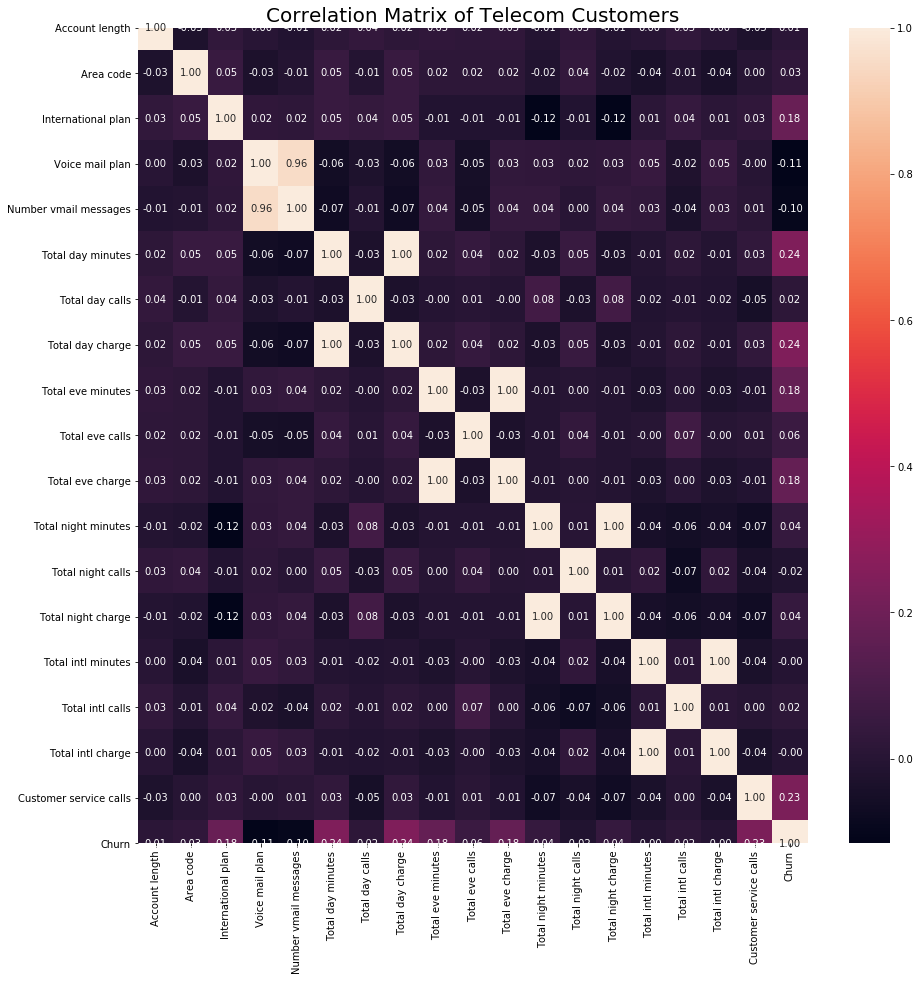

In [372]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

In [373]:
df.drop(['Area code', 'State'], axis=1, inplace=True)

In [374]:
df

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [375]:
X_train = df.drop('Churn', axis=1)


In [376]:
X_train

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [377]:
y = df.Churn

In [378]:
y

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [379]:
X_train.shape

(667, 17)

In [380]:
y.shape

(667,)

In [389]:
X_train = df.iloc[:60,:].sample(60)
X_train

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
506,163,0,0,0,202.9,100,34.49,178.6,46,15.18,203.8,116,9.17,12.8,3,3.46,5,0
317,197,0,0,0,154.8,111,26.32,171.5,102,14.58,227.3,86,10.23,10.6,2,2.86,3,0
544,90,0,1,42,193.3,66,32.86,263.3,85,22.38,214.4,97,9.65,11.1,4,3.00,0,0
622,123,0,0,0,114.8,94,19.52,150.0,104,12.75,268.6,119,12.09,9.6,4,2.59,2,0
344,88,0,0,0,148.2,82,25.19,308.7,67,26.24,235.4,79,10.59,6.4,4,1.73,2,0
489,15,0,0,0,135.2,101,22.98,152.5,79,12.96,224.8,83,10.12,8.4,5,2.27,2,0
612,139,0,0,0,139.0,110,23.63,132.9,93,11.30,272.0,120,12.24,12.1,1,3.27,0,0
213,148,0,1,11,252.9,129,42.99,284.3,88,24.17,262.8,99,11.83,12.3,1,3.32,1,0
580,57,0,0,0,161.0,113,27.37,208.0,134,17.68,208.1,81,9.36,8.4,4,2.27,3,0
5,36,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,0


In [382]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [314]:
df_train

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
249,108,0,0,0,199.3,104,33.88,224.2,92,19.06,140.1,57,6.30,15.2,2,4.10,0,0
568,65,0,1,34,208.8,119,35.50,142.1,106,12.08,214.6,87,9.66,12.5,4,3.38,4,0
159,87,1,0,0,167.3,119,28.44,198.5,119,16.87,133.1,88,5.99,11.0,6,2.97,1,0
622,123,0,0,0,114.8,94,19.52,150.0,104,12.75,268.6,119,12.09,9.6,4,2.59,2,0
426,127,0,1,27,140.1,59,23.82,223.4,111,18.99,257.9,73,11.61,3.8,10,1.03,1,0
441,100,0,0,0,210.9,85,35.85,329.3,69,27.99,127.1,78,5.72,9.4,5,2.54,4,0
355,76,0,0,0,129.7,84,22.05,177.5,80,15.09,228.9,87,10.30,7.5,3,2.03,5,1
71,54,0,0,0,210.5,102,35.79,204.5,83,17.38,127.8,53,5.75,8.5,5,2.30,1,0
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0
379,117,0,1,17,221.3,82,37.62,167.6,100,14.25,262.7,87,11.82,4.4,4,1.19,0,0


In [315]:
df_val

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
43,94,0,0,0,181.8,85,30.91,202.4,98,17.20,245.9,97,11.07,9.2,2,2.48,4,0
166,35,0,1,27,241.7,87,41.09,142.0,101,12.07,288.9,68,13.00,9.4,4,2.54,1,0
418,55,1,0,0,269.6,121,45.83,171.7,91,14.59,219.0,98,9.86,8.2,6,2.21,1,0
256,144,1,1,35,174.8,127,29.72,219.6,93,18.67,255.8,90,11.51,12.8,3,3.46,0,0
254,92,0,1,25,134.0,112,22.78,206.0,111,17.51,180.6,118,8.13,9.7,4,2.62,0,0


In [316]:
df_test

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
219,161,0,0,0,178.1,109,30.28,146.5,86,12.45,137.6,78,6.19,8.5,2,2.30,1,0
134,109,0,0,0,264.7,69,45.00,305.0,120,25.93,197.4,86,8.88,9.5,9,2.57,1,1
333,73,0,0,0,137.1,102,23.31,210.8,114,17.92,191.4,120,8.61,11.1,4,3.00,1,0
370,68,0,0,0,157.3,83,26.74,220.9,85,18.78,218.9,129,9.85,12.0,7,3.24,1,0
388,107,0,1,25,248.6,91,42.26,119.3,115,10.14,194.3,83,8.74,12.0,1,3.24,1,0


In [317]:
X_test = df_val.iloc[:,0:16].values
y_test = df_val.iloc[:,-1].values

In [318]:
y_test

array([0, 0, 0, 0, 0], dtype=int64)

In [346]:
X_test

array([[ 94.  ,   0.  ,   0.  ,   0.  , 181.8 ,  85.  ,  30.91, 202.4 ,
         98.  ,  17.2 , 245.9 ,  97.  ,  11.07,   9.2 ,   2.  ,   2.48],
       [ 35.  ,   0.  ,   1.  ,  27.  , 241.7 ,  87.  ,  41.09, 142.  ,
        101.  ,  12.07, 288.9 ,  68.  ,  13.  ,   9.4 ,   4.  ,   2.54],
       [ 55.  ,   1.  ,   0.  ,   0.  , 269.6 , 121.  ,  45.83, 171.7 ,
         91.  ,  14.59, 219.  ,  98.  ,   9.86,   8.2 ,   6.  ,   2.21],
       [144.  ,   1.  ,   1.  ,  35.  , 174.8 , 127.  ,  29.72, 219.6 ,
         93.  ,  18.67, 255.8 ,  90.  ,  11.51,  12.8 ,   3.  ,   3.46],
       [ 92.  ,   0.  ,   1.  ,  25.  , 134.  , 112.  ,  22.78, 206.  ,
        111.  ,  17.51, 180.6 , 118.  ,   8.13,   9.7 ,   4.  ,   2.62]])

# Case 1 - Bagging

In [347]:
value = 1.5
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    filler_feature_values={1:value, 2: value, 3:value, 4:value, 5:value, 6: value, 7:value, 8:value , 9:value, 10:value, 11:value, 12:value,13:value, 14:value, 15:value, 16:value},
    filler_feature_ranges={1:value, 2: value, 3:value, 4:value, 5:value, 6: value, 7:value, 8:value ,9:value, 10:value, 11:value, 12:value,13:value, 14:value, 15:value, 16:value},
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [348]:
df_bag = df_train.sample(450,replace=True)

X = df_bag.iloc[:,0:16]
y = df_bag.iloc[:,-1]

df_bag

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
355,76,0,0,0,129.7,84,22.05,177.5,80,15.09,228.9,87,10.30,7.5,3,2.03,5,1
159,87,1,0,0,167.3,119,28.44,198.5,119,16.87,133.1,88,5.99,11.0,6,2.97,1,0
441,100,0,0,0,210.9,85,35.85,329.3,69,27.99,127.1,78,5.72,9.4,5,2.54,4,0
71,54,0,0,0,210.5,102,35.79,204.5,83,17.38,127.8,53,5.75,8.5,5,2.30,1,0
426,127,0,1,27,140.1,59,23.82,223.4,111,18.99,257.9,73,11.61,3.8,10,1.03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0
426,127,0,1,27,140.1,59,23.82,223.4,111,18.99,257.9,73,11.61,3.8,10,1.03,1,0
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0


In [349]:
dt_bag1 = DecisionTreeClassifier()

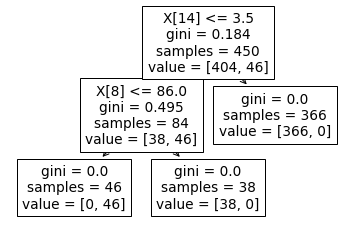

1.0


C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [350]:
evaluate(dt_bag1,X,y)

In [351]:
df_bag = df_train.sample(450,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:16]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
379,117,0,1,17,221.3,82,37.62,167.6,100,14.25,262.7,87,11.82,4.4,4,1.19,0,0
622,123,0,0,0,114.8,94,19.52,150.0,104,12.75,268.6,119,12.09,9.6,4,2.59,2,0
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0
426,127,0,1,27,140.1,59,23.82,223.4,111,18.99,257.9,73,11.61,3.8,10,1.03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,117,0,1,17,221.3,82,37.62,167.6,100,14.25,262.7,87,11.82,4.4,4,1.19,0,0
71,54,0,0,0,210.5,102,35.79,204.5,83,17.38,127.8,53,5.75,8.5,5,2.30,1,0
441,100,0,0,0,210.9,85,35.85,329.3,69,27.99,127.1,78,5.72,9.4,5,2.54,4,0
568,65,0,1,34,208.8,119,35.50,142.1,106,12.08,214.6,87,9.66,12.5,4,3.38,4,0


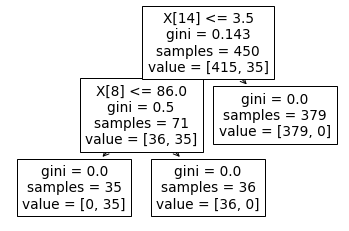

1.0


C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [352]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [353]:
# Data for Tree 3
df_bag = df_train.sample(450,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:16]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
71,54,0,0,0,210.5,102,35.79,204.5,83,17.38,127.8,53,5.75,8.5,5,2.30,1,0
379,117,0,1,17,221.3,82,37.62,167.6,100,14.25,262.7,87,11.82,4.4,4,1.19,0,0
426,127,0,1,27,140.1,59,23.82,223.4,111,18.99,257.9,73,11.61,3.8,10,1.03,1,0
478,189,0,0,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,5.6,4,1.51,3,0
622,123,0,0,0,114.8,94,19.52,150.0,104,12.75,268.6,119,12.09,9.6,4,2.59,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,117,0,1,17,221.3,82,37.62,167.6,100,14.25,262.7,87,11.82,4.4,4,1.19,0,0
379,117,0,1,17,221.3,82,37.62,167.6,100,14.25,262.7,87,11.82,4.4,4,1.19,0,0
568,65,0,1,34,208.8,119,35.50,142.1,106,12.08,214.6,87,9.66,12.5,4,3.38,4,0
355,76,0,0,0,129.7,84,22.05,177.5,80,15.09,228.9,87,10.30,7.5,3,2.03,5,1


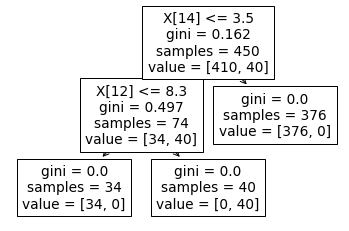

0.6


C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [354]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)